In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
os.getcwd()

'/kaggle/working'

In [24]:
df1 = pd.read_csv('../input/heart.csv')

In [25]:
#########Size of the dataset#######
df1.shape

(303, 14)

In [26]:
###########Lets take a look at the first 5 rows of our data########
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#########Information About the Dataset#########
df1.info()
#########We can see that except oldpeak all the values are in int64###########

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [28]:
#########Stats about the dataset########
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


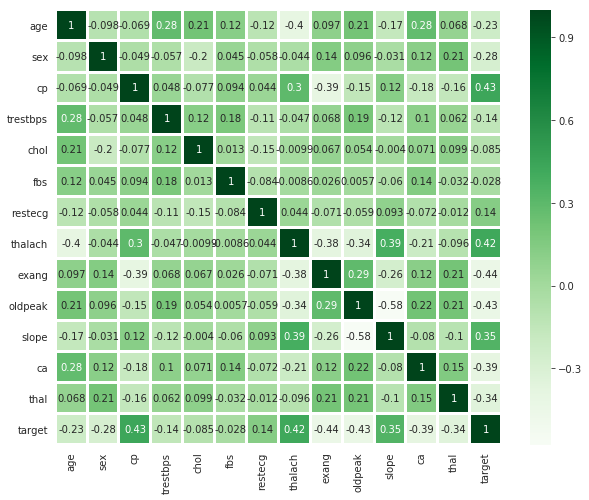

In [29]:
##########Lets take a look at how the data is correlated#########
plt.figure(figsize=(10,8))
viz1 = sns.heatmap(df1.corr(), annot = True , cmap = 'Greens',linewidths=2)
plt.show()
#####Not much of correlation in the data######

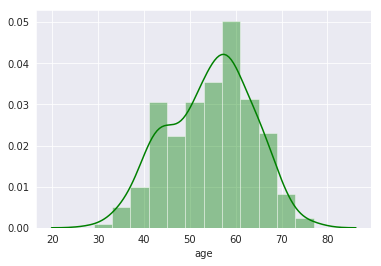

In [30]:
######Since we have age in the dataset, Let us take a look at age distribution##########
viz2 = sns.distplot(df1.age , color = 'green' , )
#########We can see that most of the people are in the age group of 40 to 60#########

In [31]:
##############Lets start digging into the data#############

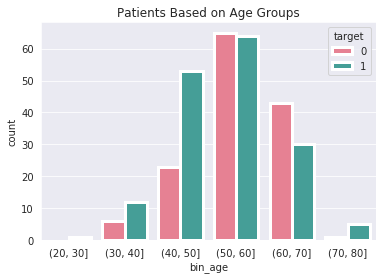

In [32]:
##########Lets pair age with heart diseases#############
#########Lets convert age into bins#############
age_bins = [20,30,40,50,60,70,80]
df2 = pd.cut(df1.age , bins = age_bins)
df1['bin_age'] = df2
df1.head()
viz3=sns.countplot(x='bin_age',data=df1 ,palette='husl',linewidth=3 , hue = 'target')
viz3.set_title("Patients Based on Age Groups")
plt.show(viz3)
#########The graph indicates most of the heart patients are in the age groups of 40's and 50's########

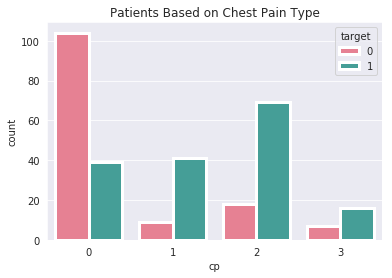

In [33]:
##########Let us take a look at how other parameters in the dataset look when paired with heart diseases#######
viz4=sns.countplot(x= 'cp',data=df1 ,palette='husl',linewidth=3 , hue = 'target')
viz4.set_title("Patients Based on Chest Pain Type")
plt.show(viz4)
##It is Obvious from the graph that most of the heart patients get chest pain type 2##

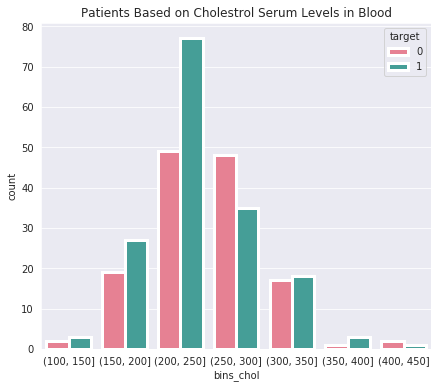

In [42]:
##############Cholestrol and Heart Diseases############
plt.figure(figsize=(7,6))
chol_bins = [100,150,200,250,300,350,400,450]
df3 = pd.cut(df1.chol , bins = chol_bins)
df1['bins_chol'] = df3
viz5=sns.countplot(x= 'bins_chol',data=df1 ,palette='husl',linewidth=3 , hue = 'target')
viz5.set_title("Patients Based on Cholestrol Serum Levels in Blood")
plt.show(viz5)

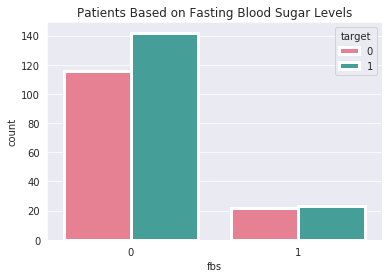

In [35]:
#########Patients Based on Fasting Blood Sugar Levels#########
viz5=sns.countplot(x= 'fbs',data=df1 ,palette='husl',linewidth=3 , hue = 'target')
viz5.set_title("Patients Based on Fasting Blood Sugar Levels")
plt.show(viz4)
##The graph points out that when fsb levels are above 120mg/dl its less likely to have a heart diesase

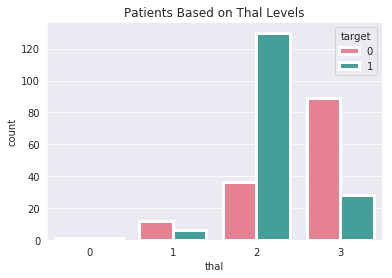

In [36]:
#########Patients Based on Thal Levels#########
viz6=sns.countplot(x= 'thal',data=df1 ,palette='husl',linewidth=3 , hue = 'target')
viz6.set_title("Patients Based on Thal Levels")
plt.show(viz6)

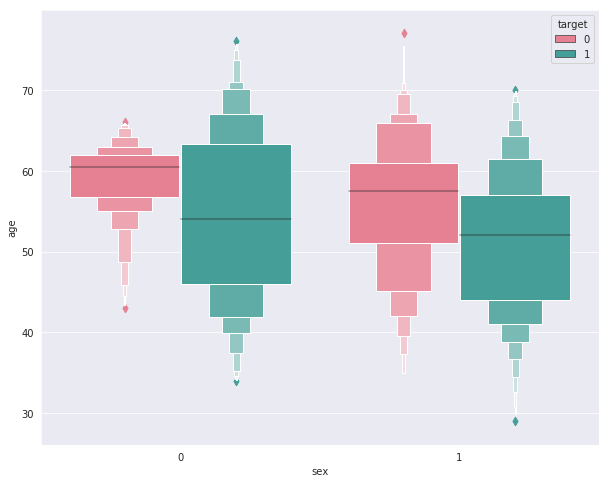

In [37]:
#########Avg Age of Heart Patients Based on Gender#######
plt.figure(figsize=(10,8))
viz7 = sns.boxenplot(x='sex', y= 'age', data=df1, hue = 'target', palette='husl')

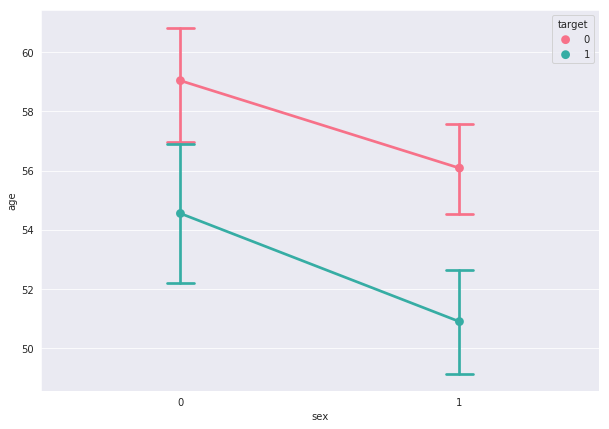

In [38]:
plt.figure(figsize=(10,7))
viz8 = sns.pointplot(x='sex', y= 'age', data=df1, hue = 'target', palette='husl', capsize = 0.1)

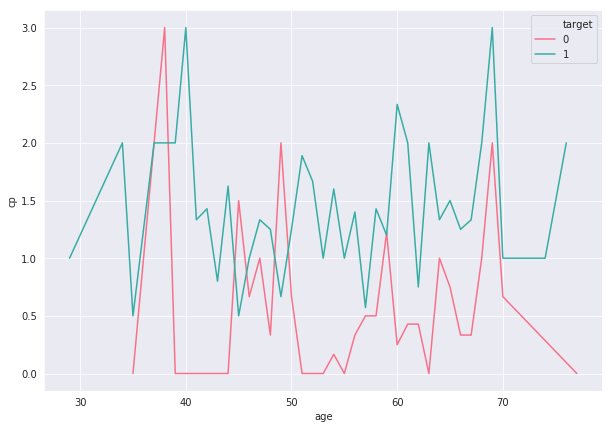

In [39]:
plt.figure(figsize=(10,7))
viz9 = sns.lineplot(data = df1 , x = 'age', y='cp',hue='target' , ci = None , palette='husl')

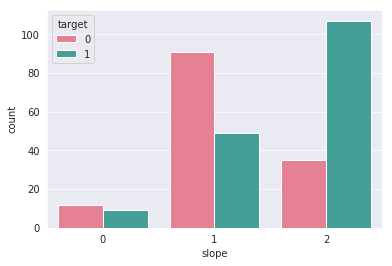

In [40]:
viz10 = sns.countplot(data = df1 , x = 'slope' , hue = 'target', palette='husl' )

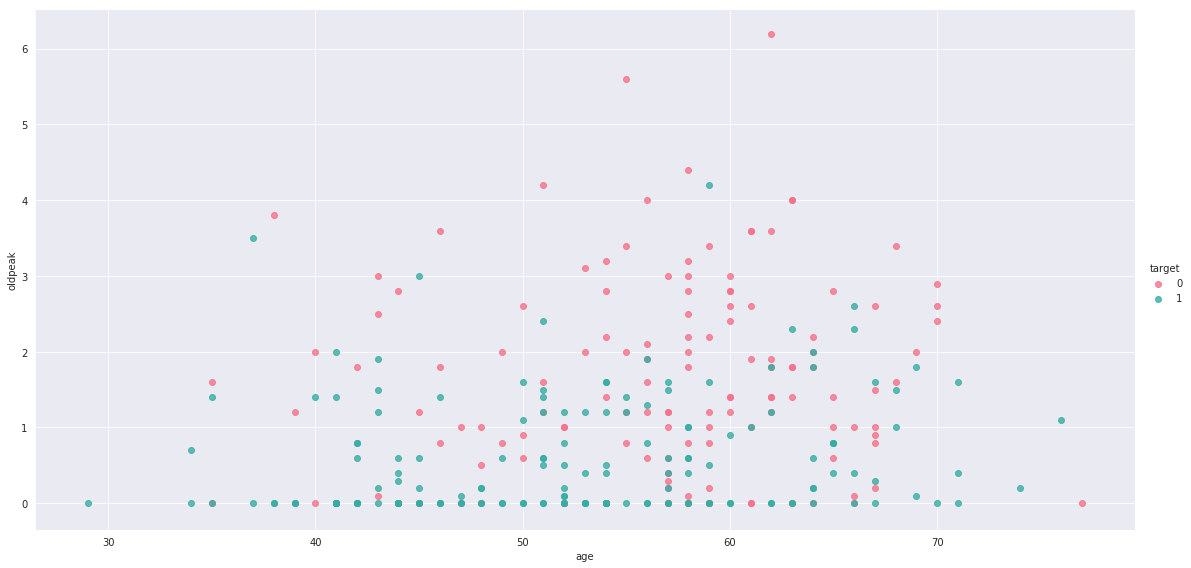

In [41]:
viz11 = sns.lmplot(data = df1 , x= 'age', y = 'oldpeak', ci=None,fit_reg=False,size=8,hue='target',aspect=2, palette='husl')